In [75]:
data ={
            "title": "Концерт в парке",
            "description": "Интересный концерт в парке",
            "image": "http://events-hack.herokuapp.com/media/event_images/2021-06-13_12-11-12.png",
            "spot_name": "ЦПКиО",
            "address": "ул. Пушкина",
            "is_free": False,
            "date_from": "2021-06-01T18:00:00Z",
            "date_to": "2021-06-30T18:00:00Z",
            "restriction": 6,
            "district_name": "Центральный",
            "spheres": [
                {
                    "id": 1,
                    "sphere_name": "Спектакли",
                    "created_at": "2021-06-13T11:08:56.859725Z",
                    "modified_at": "2021-06-13T11:08:56.859725Z"
                }
            ],
            "themes": [
                {
                    "id": 1,
                    "theme_name": "События в парках",
                    "created_at": "2021-06-13T11:10:30.234704Z",
                    "modified_at": "2021-06-13T11:10:30.235739Z"
                }
            ]
}


In [76]:
import pandas as pd

pd.DataFrame(data)

,title,description,image,spot_name,address,is_free,date_from,date_to,restriction,district_name,spheres,themes
0,Концерт в парке,Интересный концерт в парке,http://events-hack.herokuapp.com/media/event_i...,ЦПКиО,ул. Пушкина,False,2021-06-01T18:00:00Z,2021-06-30T18:00:00Z,6,Центральный,"{'id': 1, 'sphere_name': 'Спектакли', 'created...","{'id': 1, 'theme_name': 'События в парках', 'c..."


In [ ]:
!pip install pymorphy2

     |████████████████████████████████| 61kB 6.9MB/s 
     |████████████████████████████████| 8.2MB 18.1MB/s 


ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [ ]:
from datetime import datetime as dt
import pandas as pd


In [ ]:
# stop words block
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [65]:
with open('MyDrive/MyDrive/stopwords.txt', 'w') as fp:
    fp.write(";".join(stop_words))

In [ ]:
import json
with open('MyDrive/MyDrive/data.json', 'r') as fp:
        # Чтение файла 'data.json' и преобразование
        # данных JSON в объекты Python 
        data = json.load(fp)

In [ ]:
res = pd.DataFrame(data)

In [ ]:
res.head()

,id,title,text,date_from,date_to,status,free,label,restriction,kind,image,organizations,spheres,themes,districts,spots
0,98016257,«Прометей прикованный» в культурном центре «Но...,<p>Молодые актеры театра-студии &laquo;Три сту...,2021-06-29 14:00:00,2021-06-29 21:30:00,public,0,None,{'age': 12},"{'id': 'afisha', 'title': 'События афиши', 'ty...","{'id': 3172801281, 'title': None, 'copyright':...",[12585090],"[{'id': 80299, 'title': 'Спектакли', 'special'...",[],"[{'id': 5500, 'area_ids': [63501]}]","[{'id': 213210, 'title': 'Улица Сущевский Вал,..."
1,98007257,"«Этюды, пародии, клоунады» в культурном центре...","<p>В <a title="""" href=""https://novosl.ru/"" tar...",2021-06-25 18:00:00,2021-06-25 20:00:00,public,0,None,{'age': 6},"{'id': 'afisha', 'title': 'События афиши', 'ty...","{'id': 3173129281, 'title': None, 'copyright':...",[12585090],"[{'id': 80299, 'title': 'Спектакли', 'special'...",[],"[{'id': 5500, 'area_ids': [63501]}]","[{'id': 213210, 'title': 'Улица Сущевский Вал,..."
2,97981257,Посещение экспозиции Дома А.Ф. Лосева,<p>Дом А.Ф. Лосева приглашает бесплатно посети...,2021-06-16 12:00:00,2021-06-16 19:00:00,public,1,None,{'age': 12},"{'id': 'afisha', 'title': 'События афиши', 'ty...","{'id': 3173249281, 'title': None, 'copyright':...",[12585090],"[{'id': 83299, 'title': 'Экскурсии', 'special'...",[],"[{'id': 1500, 'area_ids': [1501]}]","[{'id': 1405210, 'title': 'Улица Арбат, дом 33..."
3,97975257,«История усадьбы Воронцово» в Воронцовском парке,"<p class=""p1"">Авторскую экскурсию проведет ист...",2021-06-27 12:50:00,2021-06-27 14:00:00,public,0,None,{'age': 12},"{'id': 'afisha', 'title': 'События афиши', 'ty...","{'id': 3173054281, 'title': None, 'copyright':...",[12585090],"[{'id': 83299, 'title': 'Экскурсии', 'special'...",[],"[{'id': 4500, 'area_ids': [49501]}]","[{'id': 1397210, 'title': 'Воронцовский парк, ..."
4,97938257,«Славянский орнамент» в культурном центре «Нов...,<p>На мастер-класс по городецкому орнаменту пр...,2021-06-15 13:00:00,2021-06-15 14:00:00,public,1,None,{'age': 6},"{'id': 'afisha', 'title': 'События афиши', 'ty...","{'id': 3172490281, 'title': None, 'copyright':...",[12585090],"[{'id': 239299, 'title': 'Мастер-классы', 'spe...",[],"[{'id': 5500, 'area_ids': [63501]}]","[{'id': 213210, 'title': 'Улица Сущевский Вал,..."


Clean text

In [ ]:
import re
import pymorphy2
from sklearn.feature_extraction.text import TfidfVectorizer



def clean_html(raw_html):
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', raw_html)
  cleanr = re.compile(' &.*? ')
  cleantext = re.sub(cleanr, ' ', cleantext)
  return cleantext #" ".join([i for i in cleantext.split(' ') if len(i) > 0 and i[0] != '&'])

res['body_text'] = res.text.map(clean_html)

In [ ]:
import pymorphy2
from sklearn.feature_extraction.text import TfidfVectorizer

def normalize_text_with_morph(x):
    morph = pymorphy2.MorphAnalyzer()
    alphabet = 'abcdefghijklmnopqrstuvwxyzабвгдежзийклмнопрстуфхцчшщъыьэюя '

    x = x.lower().replace("ё", "е")
    words = ''.join([[" ", i][i in alphabet] for i in x]).lower().split()
    return ' '.join([morph.parse(w)[0].normal_form for w in words])

res.body_text = res.body_text.map(normalize_text_with_morph)

In [ ]:
#  убираем стоп-слова
from nltk.corpus import stopwords

stop_words = set(stopwords.words(["russian", "english"])) #  множество русско английских стоп слов
#  надо заменить на все html спецсимволы
for i in ['nbsp', 'laquo', 'raquo', 'ndash', 'mdash', 'hellip', 'rdquo']:
    stop_words.add(i)

In [ ]:
def clean_stopwords(text):
    return " ".join([word for word in text.split() if (word not in stop_words) and (len(word) > 1)])

res.body_text = res.body_text.map(clean_stopwords)

In [ ]:
res.body_text

0       молодой актёр театр студия ступень показать сп...
1       культурный центр отчётный спектакль пародия кл...
2       дом лосев приглашать бесплатно посетить постоя...
3       авторский экскурсия провести историк михаил ко...
4       мастер класс городецкий орнамент приглашать ку...
                              ...                        
1077    семейный экскурсия музей паустовский познакоми...
1078    московский литературный музей центр паустовски...
1079    государственный музей оборона москва приглашат...
1080    музей кольцо приглашать выставка самовар предм...
1081    кинозал дарвиновский музей посмотреть фильм по...
Name: body_text, Length: 1082, dtype: object

In [ ]:
res['type'] = res.spheres.map(lambda x: ", ".join([i['title'] for i in x]))
spheres = set()
for i in res['type'].unique():
    for j in i.split(', '):
        spheres.add(j)
spheres

{'Акции',
 'Встречи',
 'Выставки',
 'День Победы',
 'День России',
 'Для детей',
 'Дни исторического и культурного наследия',
 'Зарядье',
 'Игры',
 'Квесты',
 'Кино',
 'Комфорт',
 'Комфорт: Досуговая инфраструктура',
 'Комфорт: Социальная инфраструктура: образование',
 'Концерты',
 'Лекции',
 'Мастер-классы',
 'Мой район',
 'Московский май',
 'Ночь в музее',
 'Образование',
 'Праздники',
 'События в парках',
 'Спектакли',
 'Спорт',
 'Спортивные события',
 'Уникальность',
 'Уникальность: Парки и зеленые территории',
 'Фестивали',
 'Чтения',
 'Экономика и предпринимательство',
 'Экскурсии'}

Create embeddings

In [ ]:
# tfidf

vectorizer = TfidfVectorizer(max_features=1000)
tfidfs = vectorizer.fit_transform(res.body_text)

In [ ]:
import pickle

with open('MyDrive/MyDrive/tfidfv.pickle', 'wb') as f:
    pickle.dump(vectorizer, f)

In [ ]:
# bert

2D view

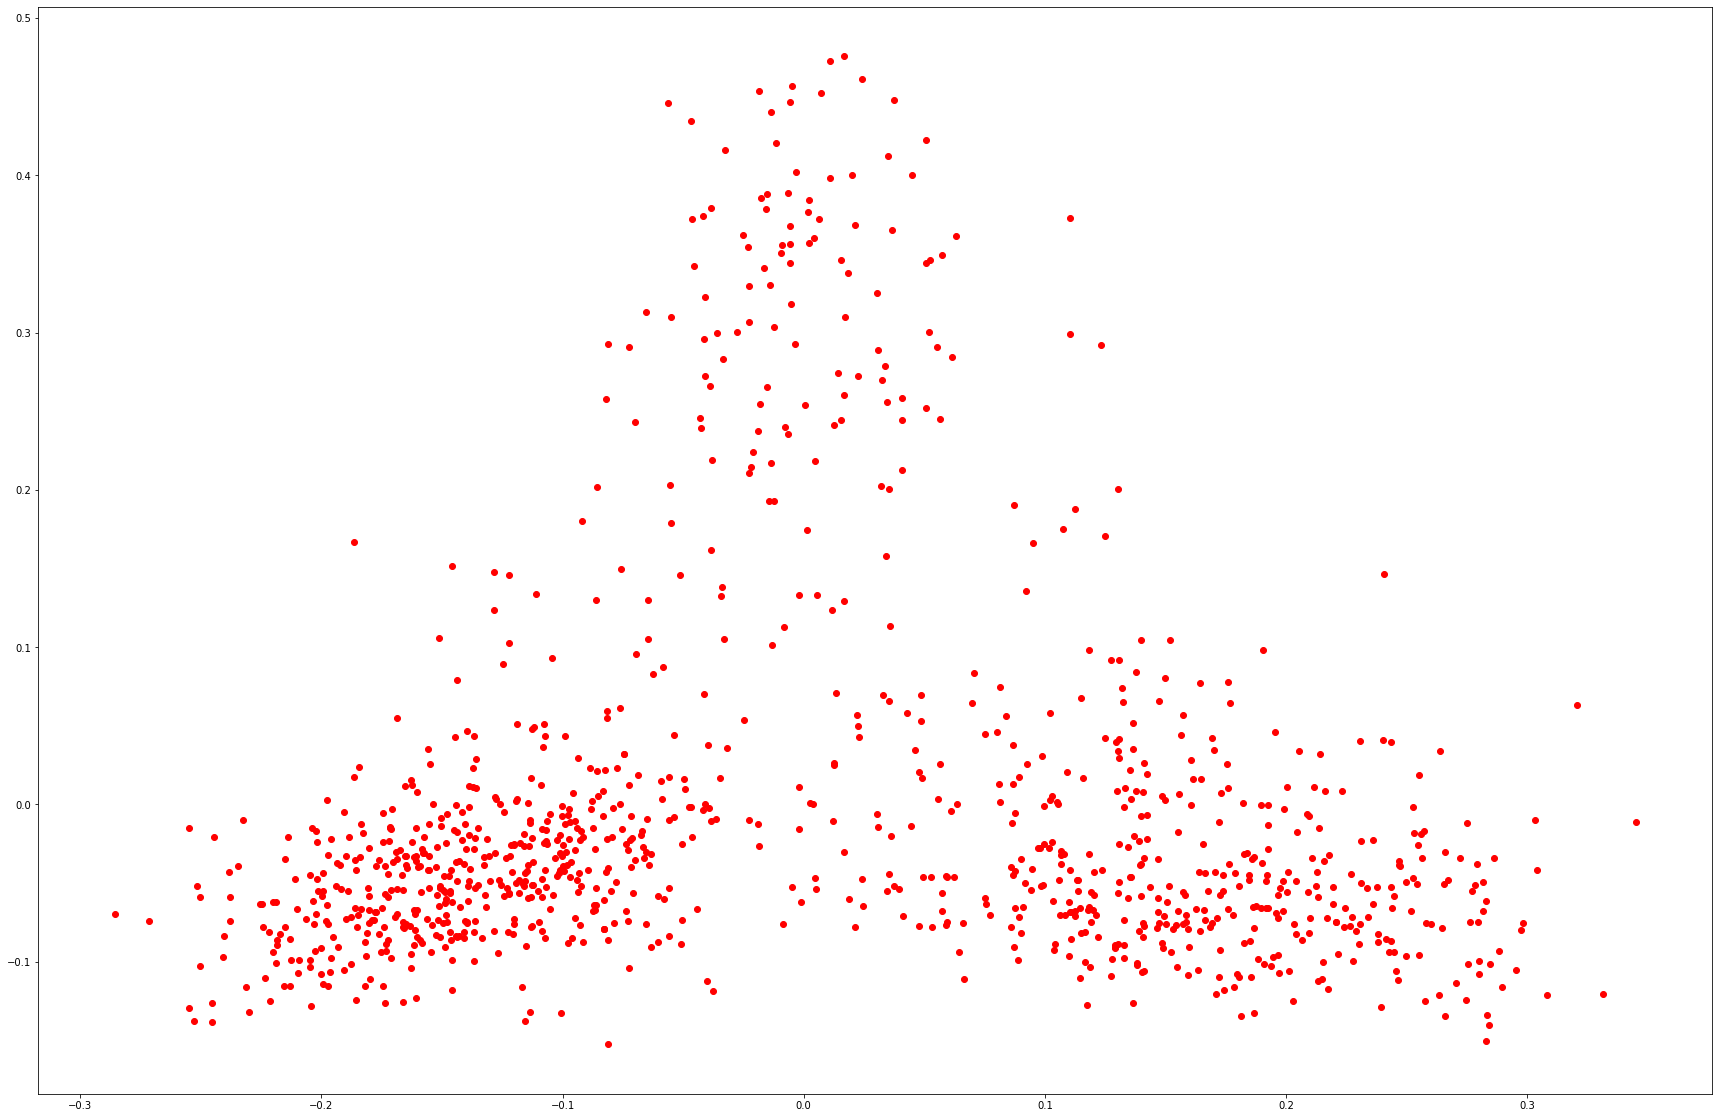

In [ ]:
# PCA
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA(n_components=2, svd_solver='full')
view_data = pca.fit_transform(tfidfs.toarray())
fig = plt.figure(figsize=(30,20))
plt.plot(view_data[:,0], view_data[:,1], 'ro')
plt.show()

In [ ]:
# LLE
from sklearn.manifold import LocallyLinearEmbedding as LLE


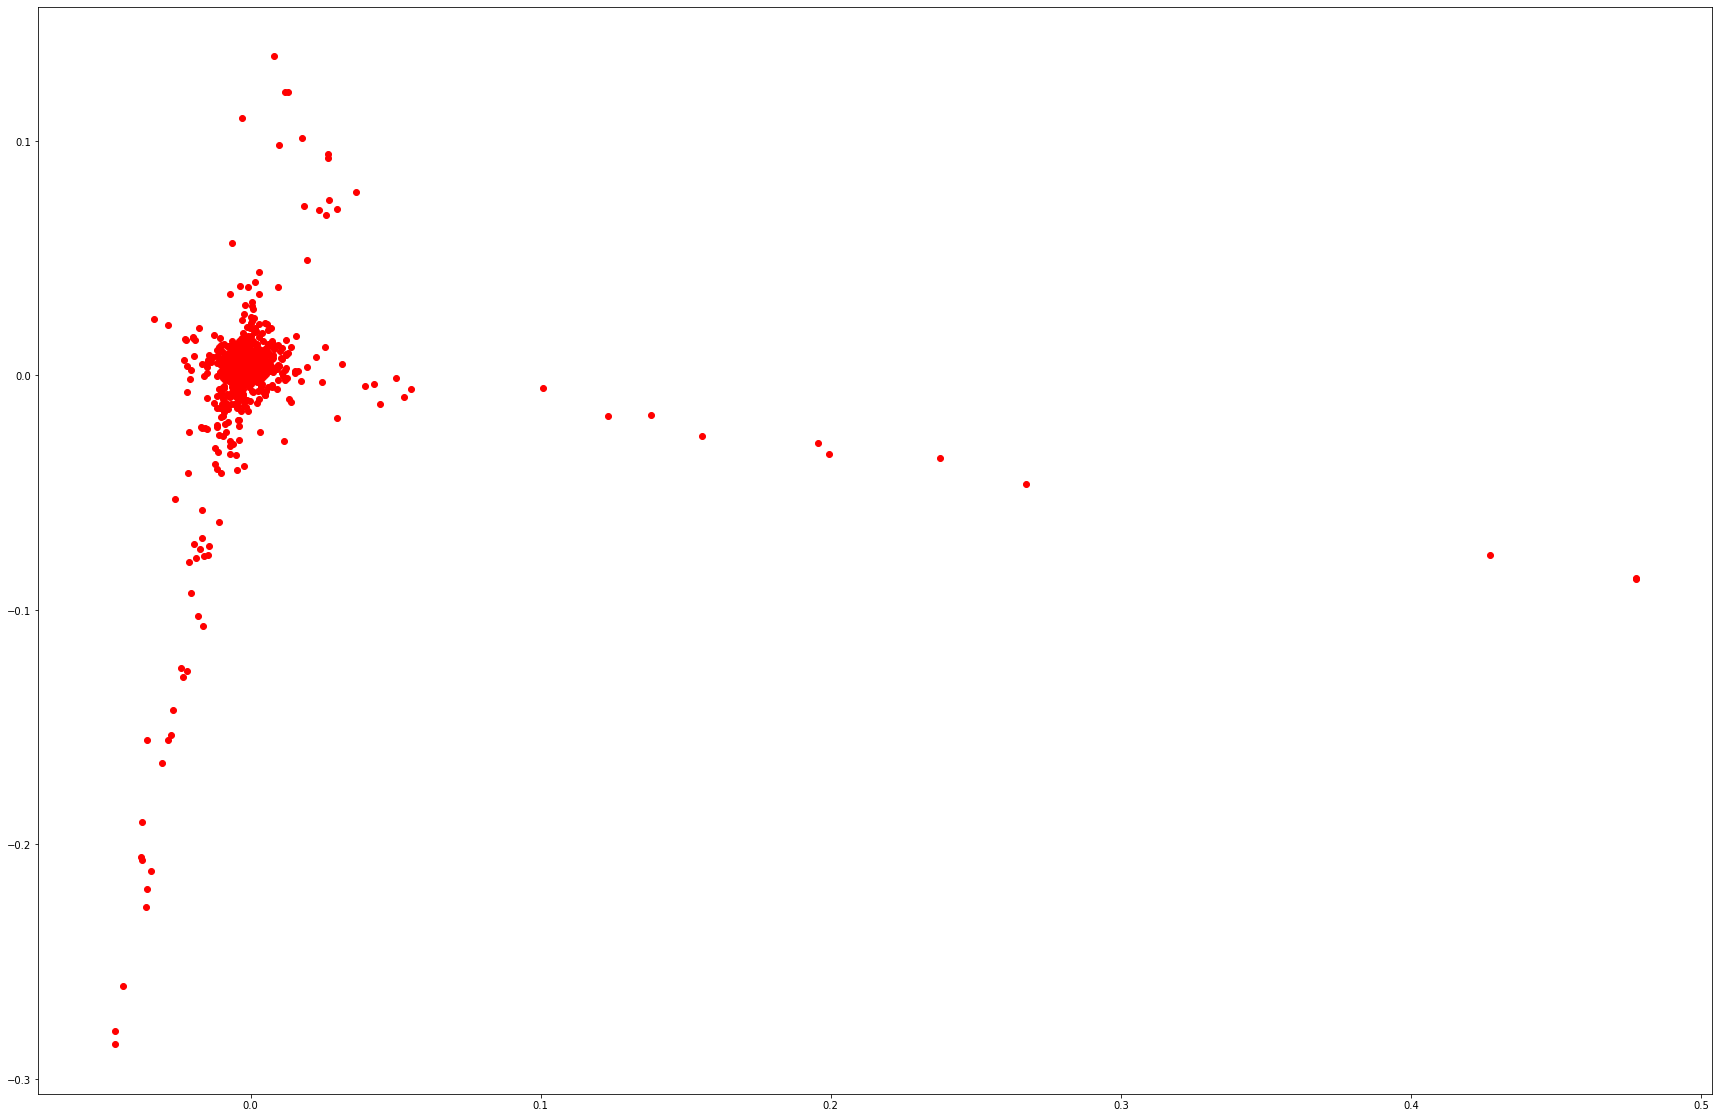

In [ ]:
lle = LLE(150)
view_data = lle.fit_transform(tfidfs.toarray())
fig = plt.figure(figsize=(30,20))
plt.plot(view_data[:,0], view_data[:,1], 'ro')
plt.show()

Clustering

In [ ]:
# DBSCAN
from sklearn.cluster import DBSCAN as dbs
clustering = dbs(eps=1, min_samples=5).fit(tfidfs.toarray())

labels = clustering.labels_

d = {i:0 for i in set(labels)}
for i in labels:
    d[i] +=1
print(d)

{0: 6, 1: 9, 2: 7, 3: 5, 4: 5, 5: 5, 6: 7, -1: 1038}


In [ ]:
# Kmeans

from sklearn.cluster import KMeans

n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(tfidfs.toarray())

labels = kmeans.labels_

d = {i:0 for i in set(labels)}
for i in labels:
    d[i] +=1
print(d)

{0: 136, 1: 116, 2: 428, 3: 184, 4: 218}


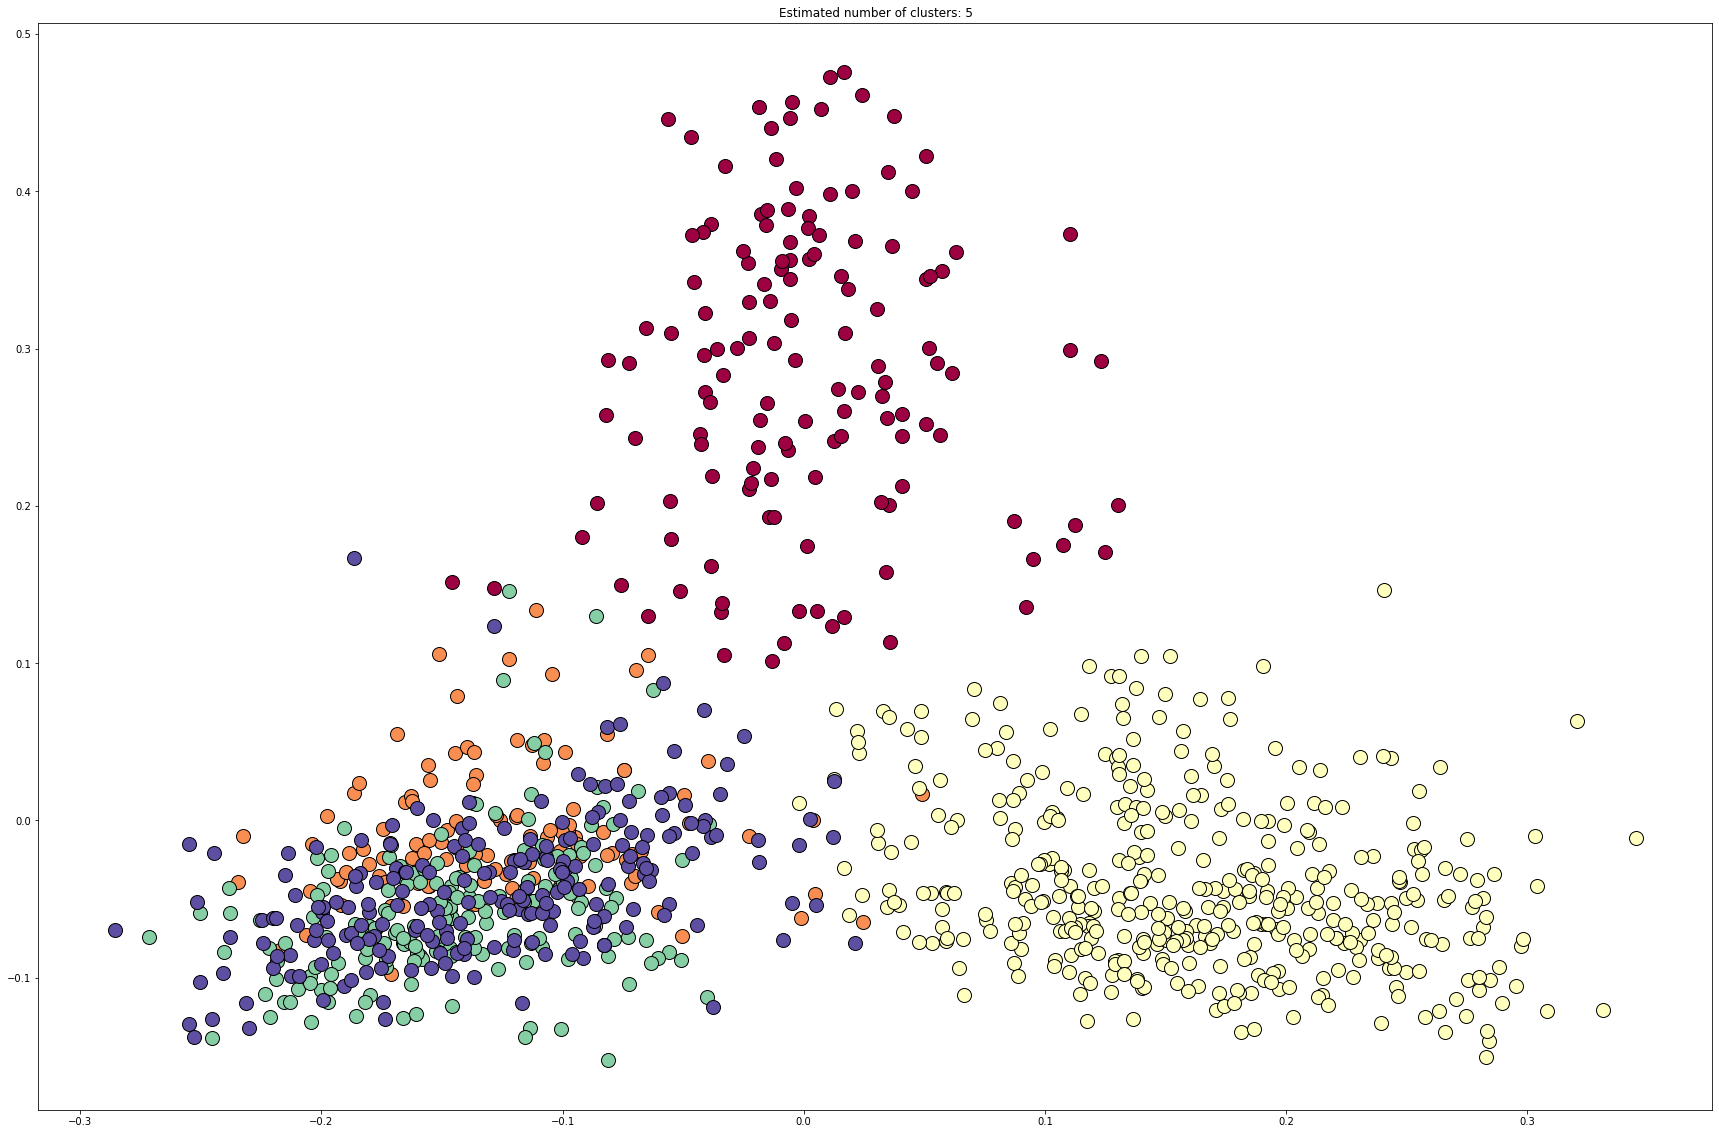

In [ ]:
import numpy as np
def draw_dots(X, labels, model_2d):
    core_samples_mask = np.zeros_like(labels, dtype=bool)

    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
            for each in np.linspace(0, 1, len(unique_labels))]
    data_2d = model_2d.fit_transform(X)

    fig = plt.figure(figsize=(30,20))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = data_2d[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                markeredgecolor='k', markersize=14)

    plt.title('Estimated number of clusters: %d' % n_clusters)
    plt.show()

draw_dots(X=tfidfs.toarray(),labels=labels, model_2d=pca)

In [ ]:
res['cluster'] = labels

In [ ]:
d = res.groupby(['cluster']).body_text.agg(lambda x: "\n".join(x))
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 3))
tfidfs_2 = vectorizer.fit_transform(d)

columns = [k for (v, k) in sorted((v, k)
           for k, v in vectorizer.vocabulary_.items())]
tfidfs_2 = pd.DataFrame(tfidfs_2.todense(),
                      columns=columns)

top_list = []
for j in range(d.shape[0]):
    top = {}
    for i in tfidfs_2.columns:
        vals = tfidfs_2[i].values
        rel = vals[j] / (sum(vals) - vals[j] + 0.01)
        if rel > 0.5:
            top[i] = rel
    top_list.append(top)


In [ ]:
for i in range(len(top_list)):
    top_list[i] = (sorted(top_list[i].items(), key=lambda x:x[1], reverse=True))

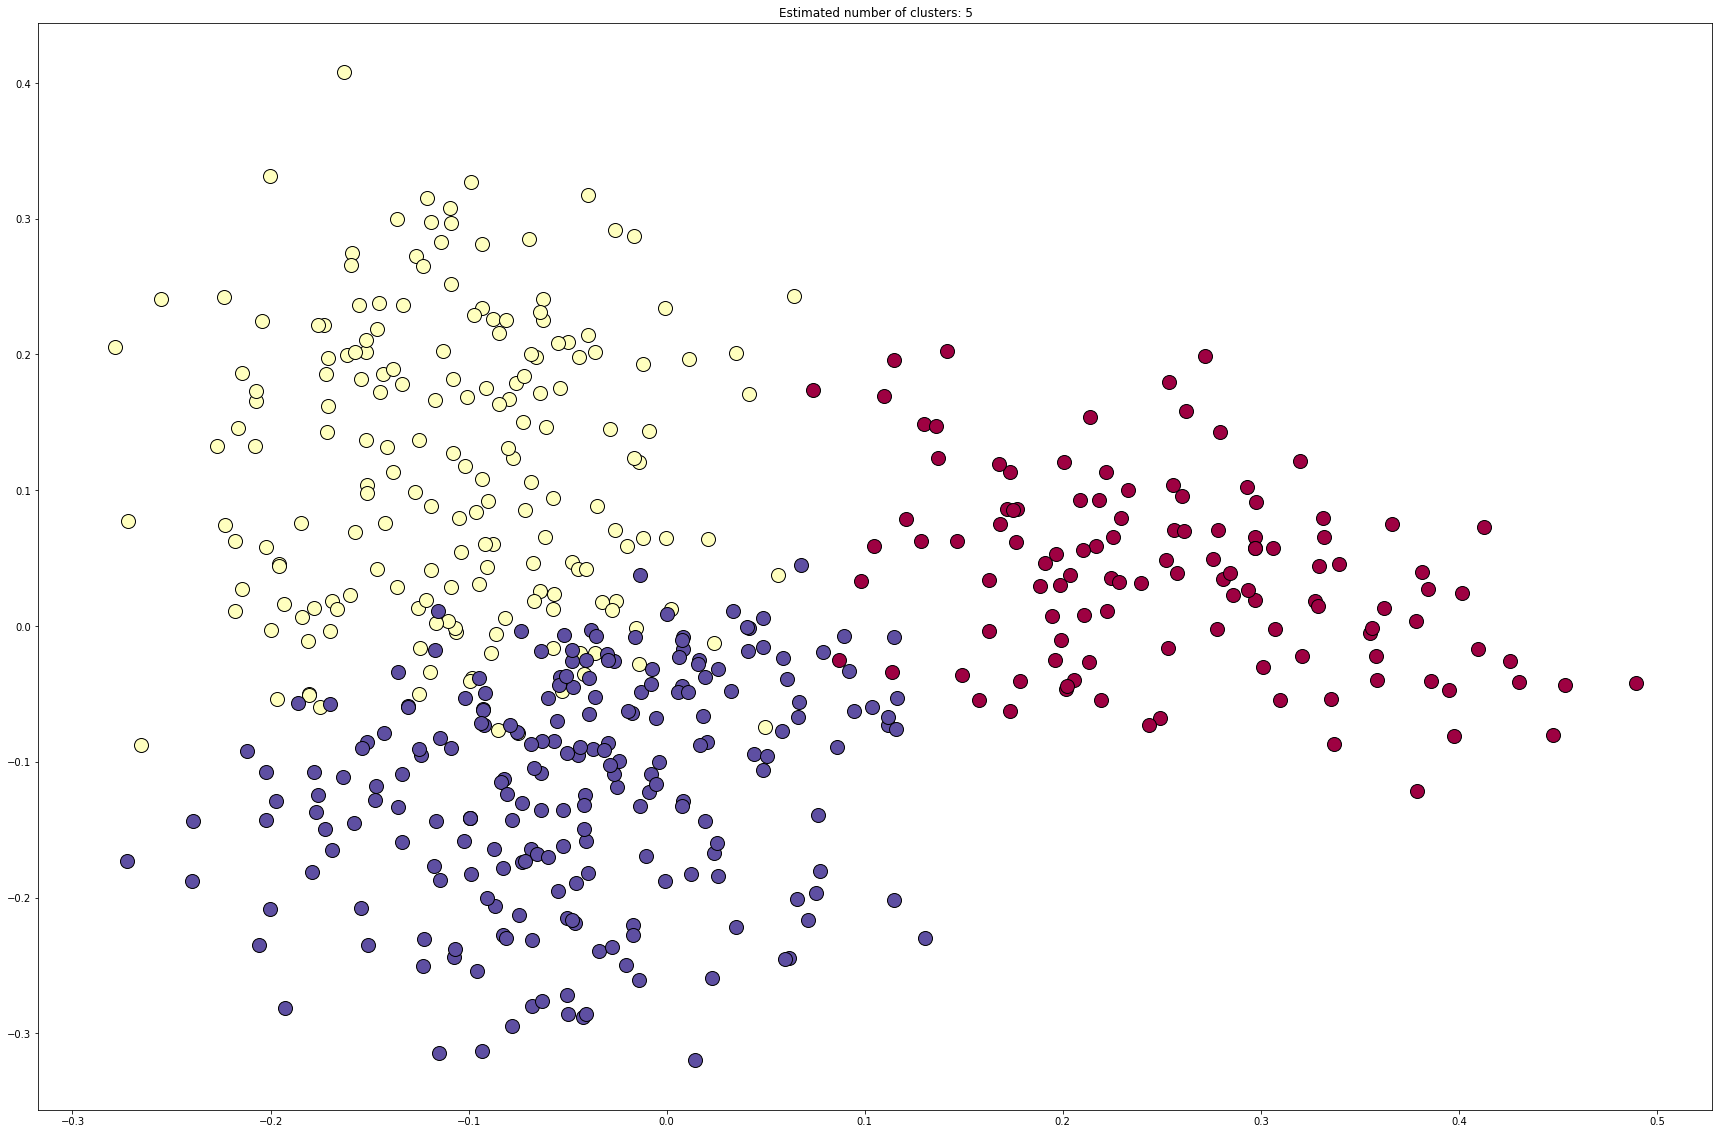

In [ ]:

n=[1,3,4]
mask = res.cluster.map(lambda x: x in n)

draw_dots(X=tfidfs.toarray()[mask],labels=labels[mask], model_2d=pca)

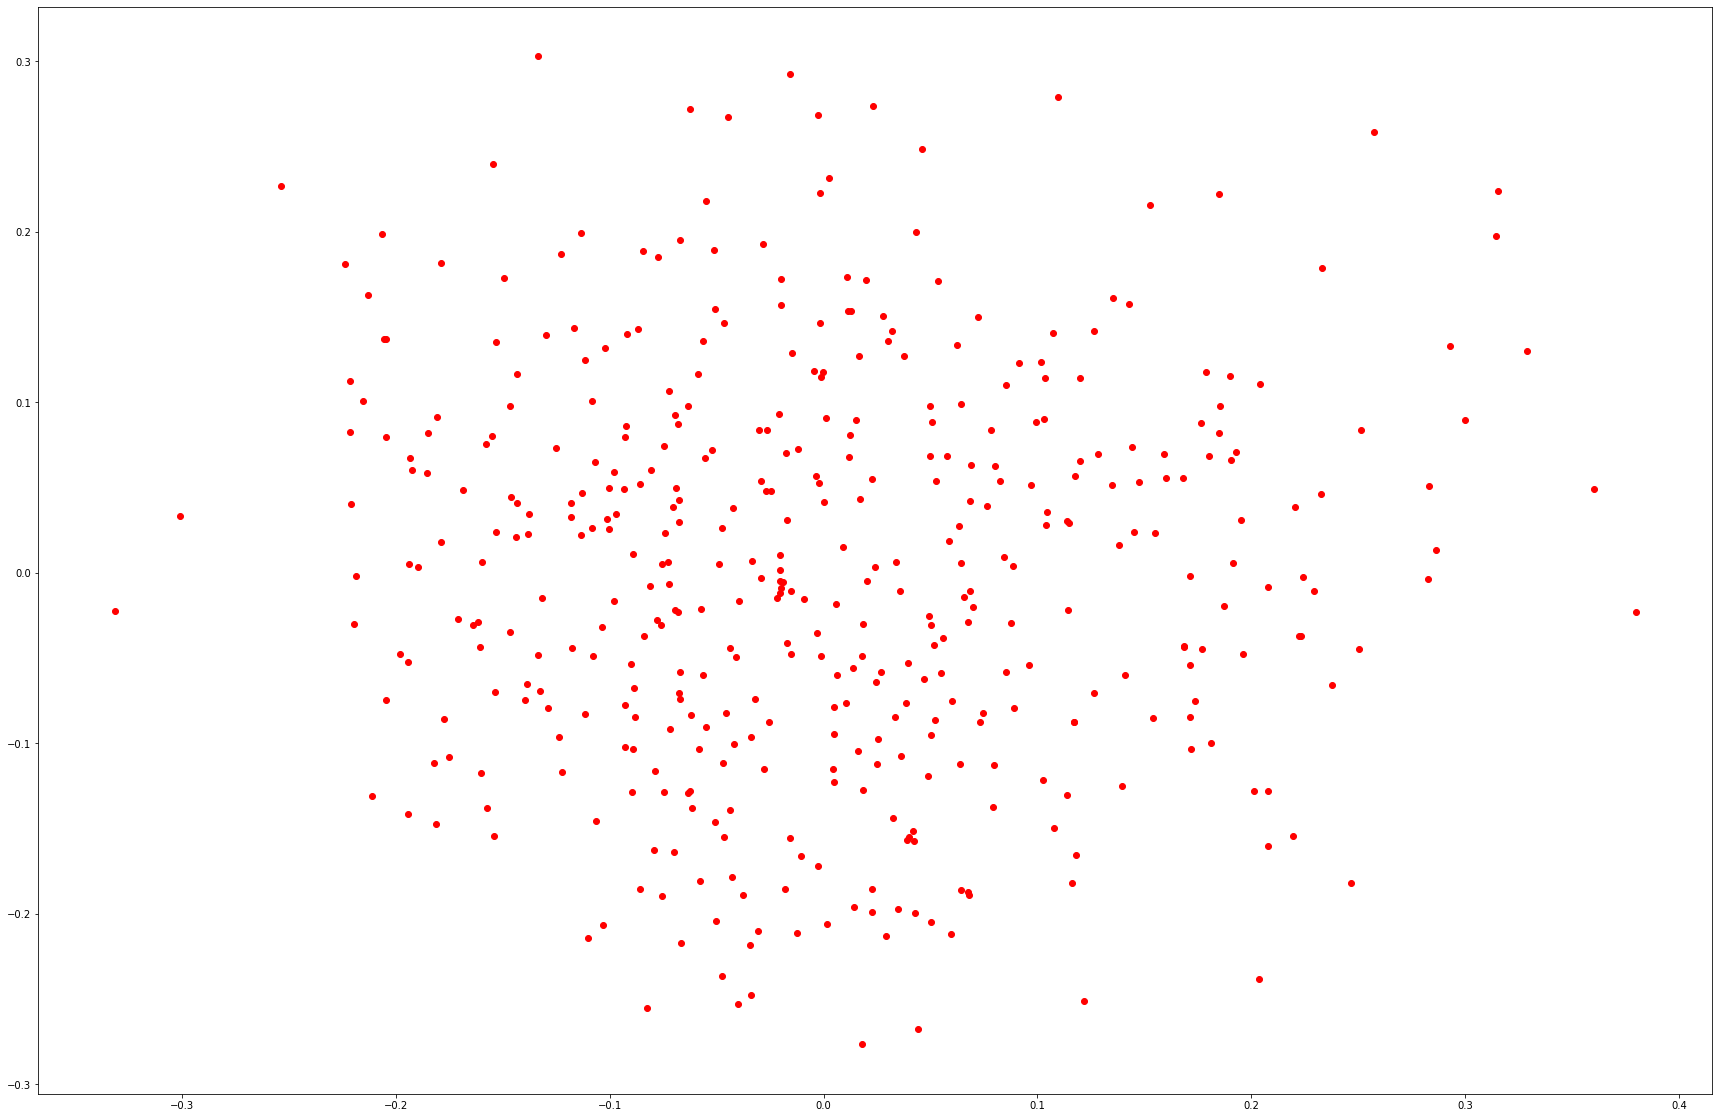

In [ ]:

n=2
mask = res.cluster.map(lambda x: x == n)

pca = PCA(n_components=2, svd_solver='full')
view_data = pca.fit_transform(tfidfs.toarray()[mask])
fig = plt.figure(figsize=(30,20))
plt.plot(view_data[:,0], view_data[:,1], 'ro')
plt.show()

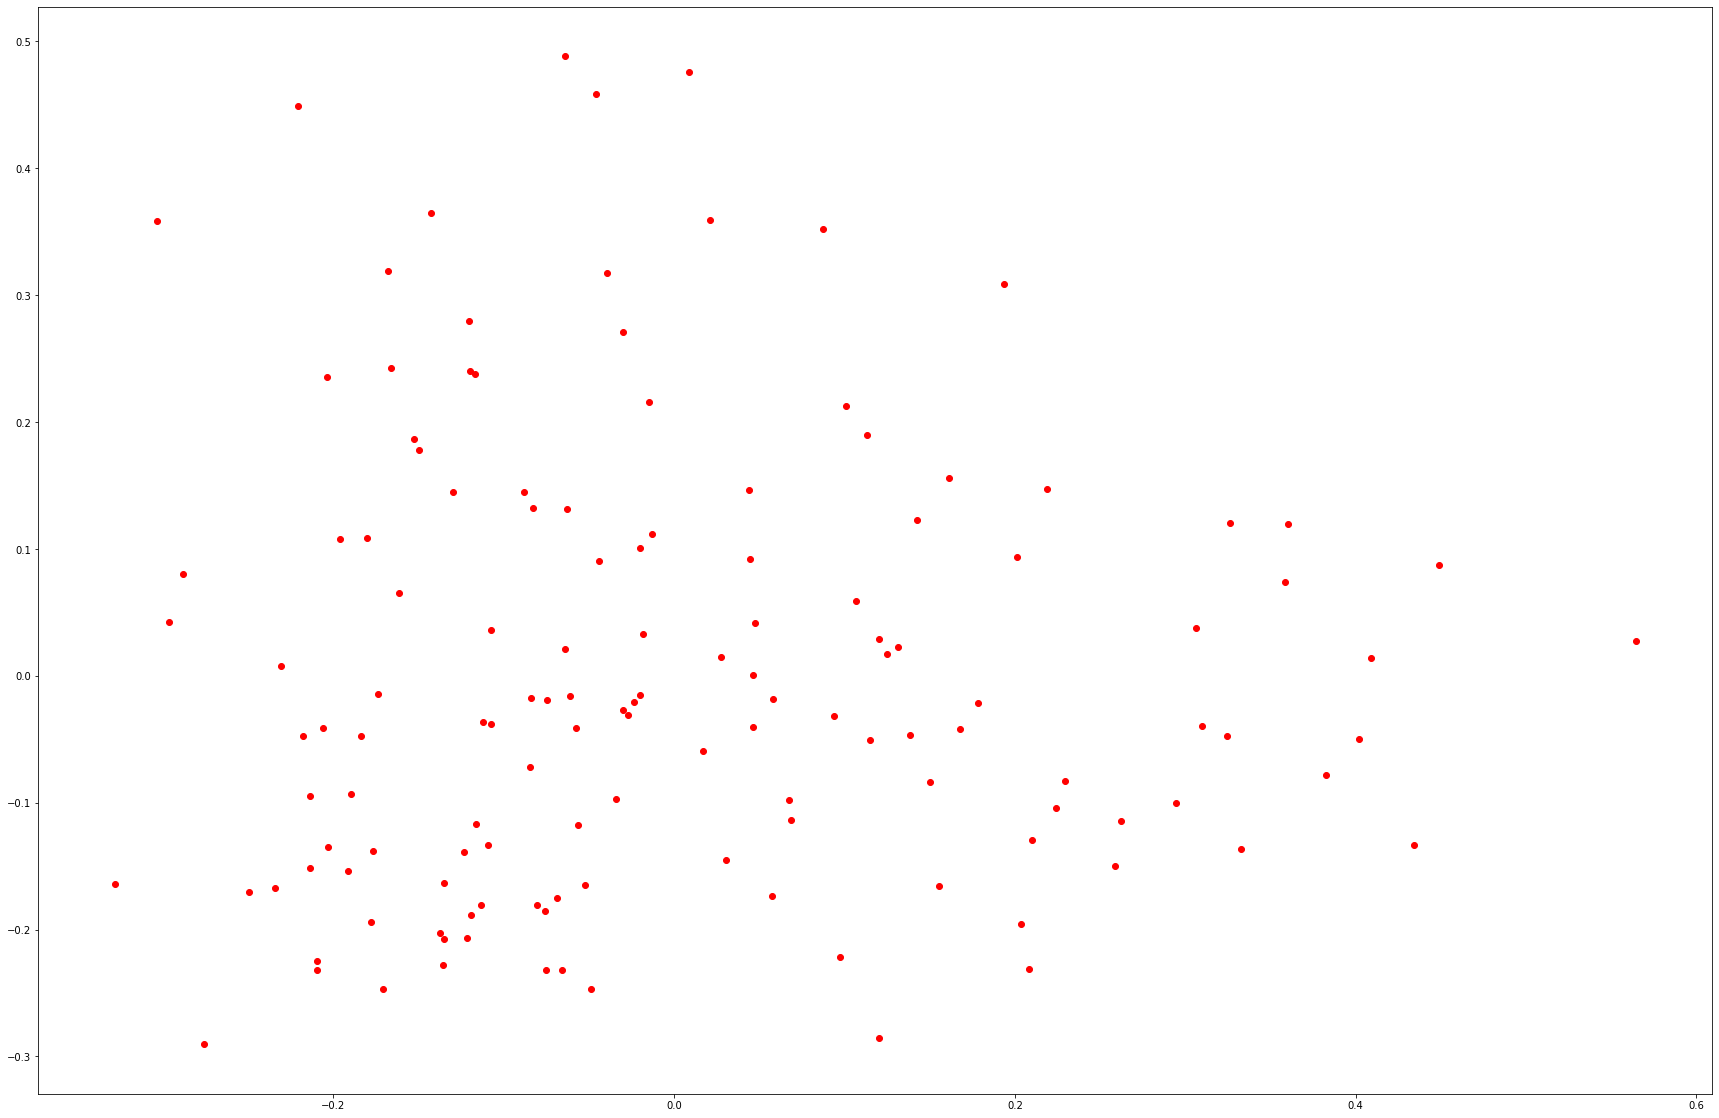

In [ ]:

n=0
mask = res.cluster.map(lambda x: x == n)

pca = PCA(n_components=2, svd_solver='full')
view_data = pca.fit_transform(tfidfs.toarray()[mask])
fig = plt.figure(figsize=(30,20))
plt.plot(view_data[:,0], view_data[:,1], 'ro')
plt.show()

In [ ]:
n = 0
res[res.cluster == n][['type']]

,type
9,Концерты
18,"Концерты, Праздники"
22,Концерты
24,Концерты
27,Концерты
...,...
930,"Концерты, Мой район, Комфорт"
931,Концерты
934,"Концерты, Мой район, Комфорт"
935,"Концерты, Спектакли, Мой район, Комфорт"


In [ ]:
n = 1
res[res.cluster == n][['type']]

,type
4,Мастер-классы
10,"Мастер-классы, Для детей"
12,Мастер-классы
13,Мастер-классы
17,"Мастер-классы, Для детей"
...,...
1026,"Образование, Мастер-классы"
1027,"Образование, Мастер-классы"
1028,"Образование, Мастер-классы"
1029,Спортивные события


In [ ]:
n = 2
res[res.cluster == n][['type']]

,type
0,Спектакли
1,Спектакли
6,Спектакли
8,Спектакли
16,Образование
...,...
953,"Спектакли, Мой район, Комфорт"
975,Спектакли
999,Спектакли
1032,Спектакли


In [ ]:
n = 3
res[res.cluster == n][['type']]

,type
7,Выставки
15,Выставки
19,Выставки
20,Выставки
26,Выставки
...,...
1073,Выставки
1075,Выставки
1076,Выставки
1079,Экскурсии


In [ ]:
n = 4
res[res.cluster == n][['type']]

,type
2,Экскурсии
3,"Экскурсии, События в парках"
5,Экскурсии
11,"Экскурсии, События в парках"
14,Экскурсии
...,...
1070,Экскурсии
1074,Выставки
1077,Экскурсии
1078,Экскурсии


Берем топ слов по сферам

In [ ]:
spheres_top = {}
vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 3))

for sph in spheres:
    corpus = ["\n".join(res[res['type'].map(lambda x: sph in x.split(', '))].body_text), 
              "\n".join(res[res['type'].map(lambda x: sph not in x.split(', '))].body_text)]
    
    tfidfs_2 = vectorizer.fit_transform(corpus)

    columns = [k for (v, k) in sorted((v, k)
            for k, v in vectorizer.vocabulary_.items())]
    tfidfs_2 = pd.DataFrame(tfidfs_2.todense(),
                        columns=columns)

    top = {}
    for i in tfidfs_2.columns:
        vals = tfidfs_2[i].values
        rel = vals[0] / (sum(vals) - vals[0] + 0.01)
        if 10 > rel > 3:
            top[i] = rel
    spheres_top[sph] = top

In [ ]:
with open('MyDrive/MyDrive/spheres_words.json', 'w') as fp:
        json.dump(spheres_top, fp)

In [ ]:
with open('MyDrive/MyDrive/spheres_words.json', 'r') as fp:
        s = json.load(fp)

In [60]:
a = []
a.extend(np.random.choice(['f', 'a', 123], 2))
a

['123', 'a']

In [62]:
spheres

{'Акции',
 'Встречи',
 'Выставки',
 'День Победы',
 'День России',
 'Для детей',
 'Дни исторического и культурного наследия',
 'Зарядье',
 'Игры',
 'Квесты',
 'Кино',
 'Комфорт',
 'Комфорт: Досуговая инфраструктура',
 'Комфорт: Социальная инфраструктура: образование',
 'Концерты',
 'Лекции',
 'Мастер-классы',
 'Мой район',
 'Московский май',
 'Ночь в музее',
 'Образование',
 'Праздники',
 'События в парках',
 'Спектакли',
 'Спорт',
 'Спортивные события',
 'Уникальность',
 'Уникальность: Парки и зеленые территории',
 'Фестивали',
 'Чтения',
 'Экономика и предпринимательство',
 'Экскурсии'}

In [63]:
nltk.version_info

sys.version_info(major=3, minor=7, micro=10, releaselevel='final', serial=0)

Соберем частотные слова


In [ ]:
vectorizer = TfidfVectorizer(max_features=500, ngram_range=(1, 3), use_idf=False)
tfidfs_2 = vectorizer.fit_transform(["\n".join(res['body_text'])])

columns = [k for (v, k) in sorted((v, k)
           for k, v in vectorizer.vocabulary_.items())]
tfidfs_2 = pd.DataFrame(tfidfs_2.todense(),
                      columns=columns)

top = {}
for i in tfidfs_2.columns:
    val = sum(tfidfs_2[i].values) * 100
    top[i] = val
pd.Series(top).quantile([.25, .75])

0.25    1.358339
0.75    3.353398
dtype: float64

In [ ]:
top = pd.Series(top)
for i in top[(top.quantile(.25) < top) & (top < top.quantile(.75))].index:
    print(i)

xix
xix век
xviii
xviii век
xx
xx век
авторский
академия
актёр
акция
акция музей
анастасия
андрей
анна
ансамбль
антон
арт
артист россия
балет
бесплатный
библиотека
билет приобрести
билет приобрести сайт
билет сайт
борис
булгаков
быт
валерий
василий
великий отечественный
великий отечественный война
вечер
вещь
взрослый
вид
вместе
военный
возраст
вокальный
вопрос
впервые
встреча
второй
выставочный
выступить
галерея
главный герой
говорить
государственный музей
группа
действие
детский
дирижёр
документ
дом музыка
дочь
драматический
драматург
древний
евгений
екатерина
елена
ещё
жанр
ждать
жена
женщина
живой
живопись
заслужить
здание
знаменитый
игра
играть
идея
интерактивный
интересный
исполнение
исполнять
исторический культурный
исторический культурный наследие
июнь
камерный
картина
квартира
классический
книга
количество
коллектив
коллекция
комедия
композиция
конец
концертный
кроме
культурный наследие
культурный центр
купить
лауреат международный
лекция
летие
личный
лосев
май
маленький
марина

In [ ]:
top.shape

(500,)

In [ ]:
spheres_top

{'Акции': {'авторский': 3.7791187593248923,
  'акция': 6.179356678451765,
  'акция музей': 3.719849818380607,
  'дуров': 4.096809402688743,
  'июнь': 3.1129742776214835,
  'квест': 3.465485007904664,
  'необходимо': 3.8196919196882906,
  'профессиональный': 6.930970015809328,
  'растение': 4.947389558422397,
  'сайт музей': 4.724657639737616,
  'смена': 4.425783863962373,
  'специальный': 6.638675795943558,
  'съёмка': 5.192160715724113,
  'территория': 5.893100804949247,
  'фотограф': 5.192160715724113},
 'Встречи': {'акция': 3.6428824500039663,
  'акция музей': 5.051120594748153,
  'библиотека': 3.091301018705274,
  'васильев': 6.321943010037605,
  'ведущий': 5.296833824548092,
  'вести': 5.975034126205884,
  'военный': 3.4144191519283655,
  'вопрос': 9.513797598945795,
  'встреча': 6.425841769202595,
  'гость': 3.2884594044027775,
  'группа': 3.150937817838561,
  'елена': 4.374669794120816,
  'людмила': 6.852408338020937,
  'мемориальный': 4.260554309459967,
  'мероприятие': 3.45048

Выбор вопроса

In [ ]:
# по составу

In [ ]:
# по тематике
res.head()

,id,title,text,date_from,date_to,status,free,label,restriction,kind,image,organizations,spheres,themes,districts,spots,body_text,type,cluster
0,98016257,«Прометей прикованный» в культурном центре «Но...,<p>Молодые актеры театра-студии &laquo;Три сту...,2021-06-29 14:00:00,2021-06-29 21:30:00,public,0,None,{'age': 12},"{'id': 'afisha', 'title': 'События афиши', 'ty...","{'id': 3172801281, 'title': None, 'copyright':...",[12585090],"[{'id': 80299, 'title': 'Спектакли', 'special'...",[],"[{'id': 5500, 'area_ids': [63501]}]","[{'id': 213210, 'title': 'Улица Сущевский Вал,...",молодой актёр театр студия ступень показать сп...,Спектакли,2
1,98007257,"«Этюды, пародии, клоунады» в культурном центре...","<p>В <a title="""" href=""https://novosl.ru/"" tar...",2021-06-25 18:00:00,2021-06-25 20:00:00,public,0,None,{'age': 6},"{'id': 'afisha', 'title': 'События афиши', 'ty...","{'id': 3173129281, 'title': None, 'copyright':...",[12585090],"[{'id': 80299, 'title': 'Спектакли', 'special'...",[],"[{'id': 5500, 'area_ids': [63501]}]","[{'id': 213210, 'title': 'Улица Сущевский Вал,...",культурный центр отчётный спектакль пародия кл...,Спектакли,2
2,97981257,Посещение экспозиции Дома А.Ф. Лосева,<p>Дом А.Ф. Лосева приглашает бесплатно посети...,2021-06-16 12:00:00,2021-06-16 19:00:00,public,1,None,{'age': 12},"{'id': 'afisha', 'title': 'События афиши', 'ty...","{'id': 3173249281, 'title': None, 'copyright':...",[12585090],"[{'id': 83299, 'title': 'Экскурсии', 'special'...",[],"[{'id': 1500, 'area_ids': [1501]}]","[{'id': 1405210, 'title': 'Улица Арбат, дом 33...",дом лосев приглашать бесплатно посетить постоя...,Экскурсии,4
3,97975257,«История усадьбы Воронцово» в Воронцовском парке,"<p class=""p1"">Авторскую экскурсию проведет ист...",2021-06-27 12:50:00,2021-06-27 14:00:00,public,0,None,{'age': 12},"{'id': 'afisha', 'title': 'События афиши', 'ty...","{'id': 3173054281, 'title': None, 'copyright':...",[12585090],"[{'id': 83299, 'title': 'Экскурсии', 'special'...",[],"[{'id': 4500, 'area_ids': [49501]}]","[{'id': 1397210, 'title': 'Воронцовский парк, ...",авторский экскурсия провести историк михаил ко...,"Экскурсии, События в парках",4
4,97938257,«Славянский орнамент» в культурном центре «Нов...,<p>На мастер-класс по городецкому орнаменту пр...,2021-06-15 13:00:00,2021-06-15 14:00:00,public,1,None,{'age': 6},"{'id': 'afisha', 'title': 'События афиши', 'ty...","{'id': 3172490281, 'title': None, 'copyright':...",[12585090],"[{'id': 239299, 'title': 'Мастер-классы', 'spe...",[],"[{'id': 5500, 'area_ids': [63501]}]","[{'id': 213210, 'title': 'Улица Сущевский Вал,...",мастер класс городецкий орнамент приглашать ку...,Мастер-классы,1


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity as coss
import numpy as  np

In [ ]:
X = vectorizer.transform(['послушать пиковая дама спектакль пьеса театр постановка'])
cnt = 0
for i in coss(X, tfidfs)[0]:
    if i != 0:
        cnt +=1


ValueError: ignored

In [ ]:
np.quantile(coss(X, tfidfs)[0], [.25])[0]


In [ ]:
res['dist'] = coss(X, tfidfs)[0]

In [ ]:
v = res[res['dist'] <= 0]['type'].value_counts().to_dict()
keys = list(v.keys())
for i in keys:
    if len(i.split(", ")) > 1:
        for j in i.split(", "):
            if j in v.keys():
                v[j] += v[i]
            else:
                v[j] = v[i]
        del v[i]
sorted(v.items(), key=lambda item: item[1], reverse=True)[:4]

In [ ]:
def calc_themes(q):

    v = res[(1 >= res['dist']) &  (res['dist'] >= 0.06843663)]['type'].value_counts().to_dict()
    keys = list(v.keys())
    for i in keys:
        if len(i.split(", ")) > 1:
            for j in i.split(", "):
                if j in v.keys():
                    v[j] += v[i]
                else:
                    v[j] = v[i]
            del v[i]
    return sorted(v.items(), key=lambda item: item[1], reverse=True)[:4]
calc_themes(q=1)

In [ ]:
res.id.iloc[:5].tolist()

In [ ]:
r = res[['id', 'dist']].set_index('id')
r = {k: v for k, v in sorted(r.to_dict()['dist'].items(), key=lambda item: item[1], reverse=True)}

list(r.keys())[:16]

In [ ]:
np.random.choice(['1','a','696'])